In [1]:
import sys

sys.path.append("../")

In [2]:
%load_ext autoreload
%autoreload 2

In [14]:
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

# import data.drawings.make_tasks as drawing_tasks
from src.analysis_utilities import SynthesisExperimentAnalyzer
from src.config_builder import ExperimentType

In [4]:
sns.set_theme(style="whitegrid", font_scale=1.25, rc={'figure.figsize':(12, 8)})

In [5]:
%config InlineBackend.figure_format = 'retina'

In [6]:
EXPERIMENT_NAME = "runs_multi"

COMPUTE_LIKELIHOODS = True

FIGURES_DIR = os.path.join("figures", EXPERIMENT_NAME)
os.makedirs(FIGURES_DIR, exist_ok=True)

In [7]:
analyzer = SynthesisExperimentAnalyzer(
    experiment_name=EXPERIMENT_NAME,
    experiment_types=["baseline_dreamcoder", "gpt_solver", "gpt_solver_stitch_namer", "gpt_solver_stitch_namer_hybrid_dsl", "gpt_solver_stitch_namer_search"],
    allow_incomplete_results=True,
    compute_likelihoods=COMPUTE_LIKELIHOODS,
    batch_size = 96,
    seeds = [111, 222, 333],
)

Experiment directory: ../experiments_iterative/outputs/runs_multi
Available domains: ['re2', 'clevr', 'logo']


# Tasks solved vs. LAPS iteration

In [8]:
df_results = analyzer.get_synthesis_summary()
df_results

domain                 experiment_type  seed  iteration  split  n_solved  \
0    clevr             baseline_dreamcoder   111          0   test        43   
1    clevr             baseline_dreamcoder   111          0  train        41   
2    clevr             baseline_dreamcoder   111          1  train        97   
3    clevr             baseline_dreamcoder   111          2  train       127   
4    clevr             baseline_dreamcoder   111          3   test        86   
..     ...                             ...   ...        ...    ...       ...   
687    re2  gpt_solver_stitch_namer_search   333         12  train       327   
688    re2  gpt_solver_stitch_namer_search   333         13  train       328   
689    re2  gpt_solver_stitch_namer_search   333         14  train       332   
690    re2  gpt_solver_stitch_namer_search   333         15   test       334   
691    re2  gpt_solver_stitch_namer_search   333         15  train       333   

     percent_solved  
0          0.417476  
1          0.214660  
2          0.507853  
3          0.664921  
4          0.834951  
..              ...  
687        0.665988  
688        0.668024  
689        0.676171  
690        0.668000  
691        0.678208  

[692 rows x 7 columns]

In [9]:
df_results.iteration = df_results.iteration.astype(int)

In [10]:
df_results.iteration.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [11]:
analyzer.format_dataframe_camera(df_results)

domain            Model  seed  iteration  split  n_solved  \
0    CLEVR       DreamCoder   111          0   test        43   
1    CLEVR       DreamCoder   111          0  train        41   
2    CLEVR       DreamCoder   111          1  train        97   
3    CLEVR       DreamCoder   111          2  train       127   
4    CLEVR       DreamCoder   111          3   test        86   
..     ...              ...   ...        ...    ...       ...   
687  REGEX  LILO (+ Search)   333         12  train       327   
688  REGEX  LILO (+ Search)   333         13  train       328   
689  REGEX  LILO (+ Search)   333         14  train       332   
690  REGEX  LILO (+ Search)   333         15   test       334   
691  REGEX  LILO (+ Search)   333         15  train       333   

     Tasks solved (%)  
0           41.747573  
1           21.465969  
2           50.785340  
3           66.492147  
4           83.495146  
..                ...  
687         66.598778  
688         66.802444  
689         67.617108  
690         66.800000  
691         67.820774  

[692 rows x 7 columns]

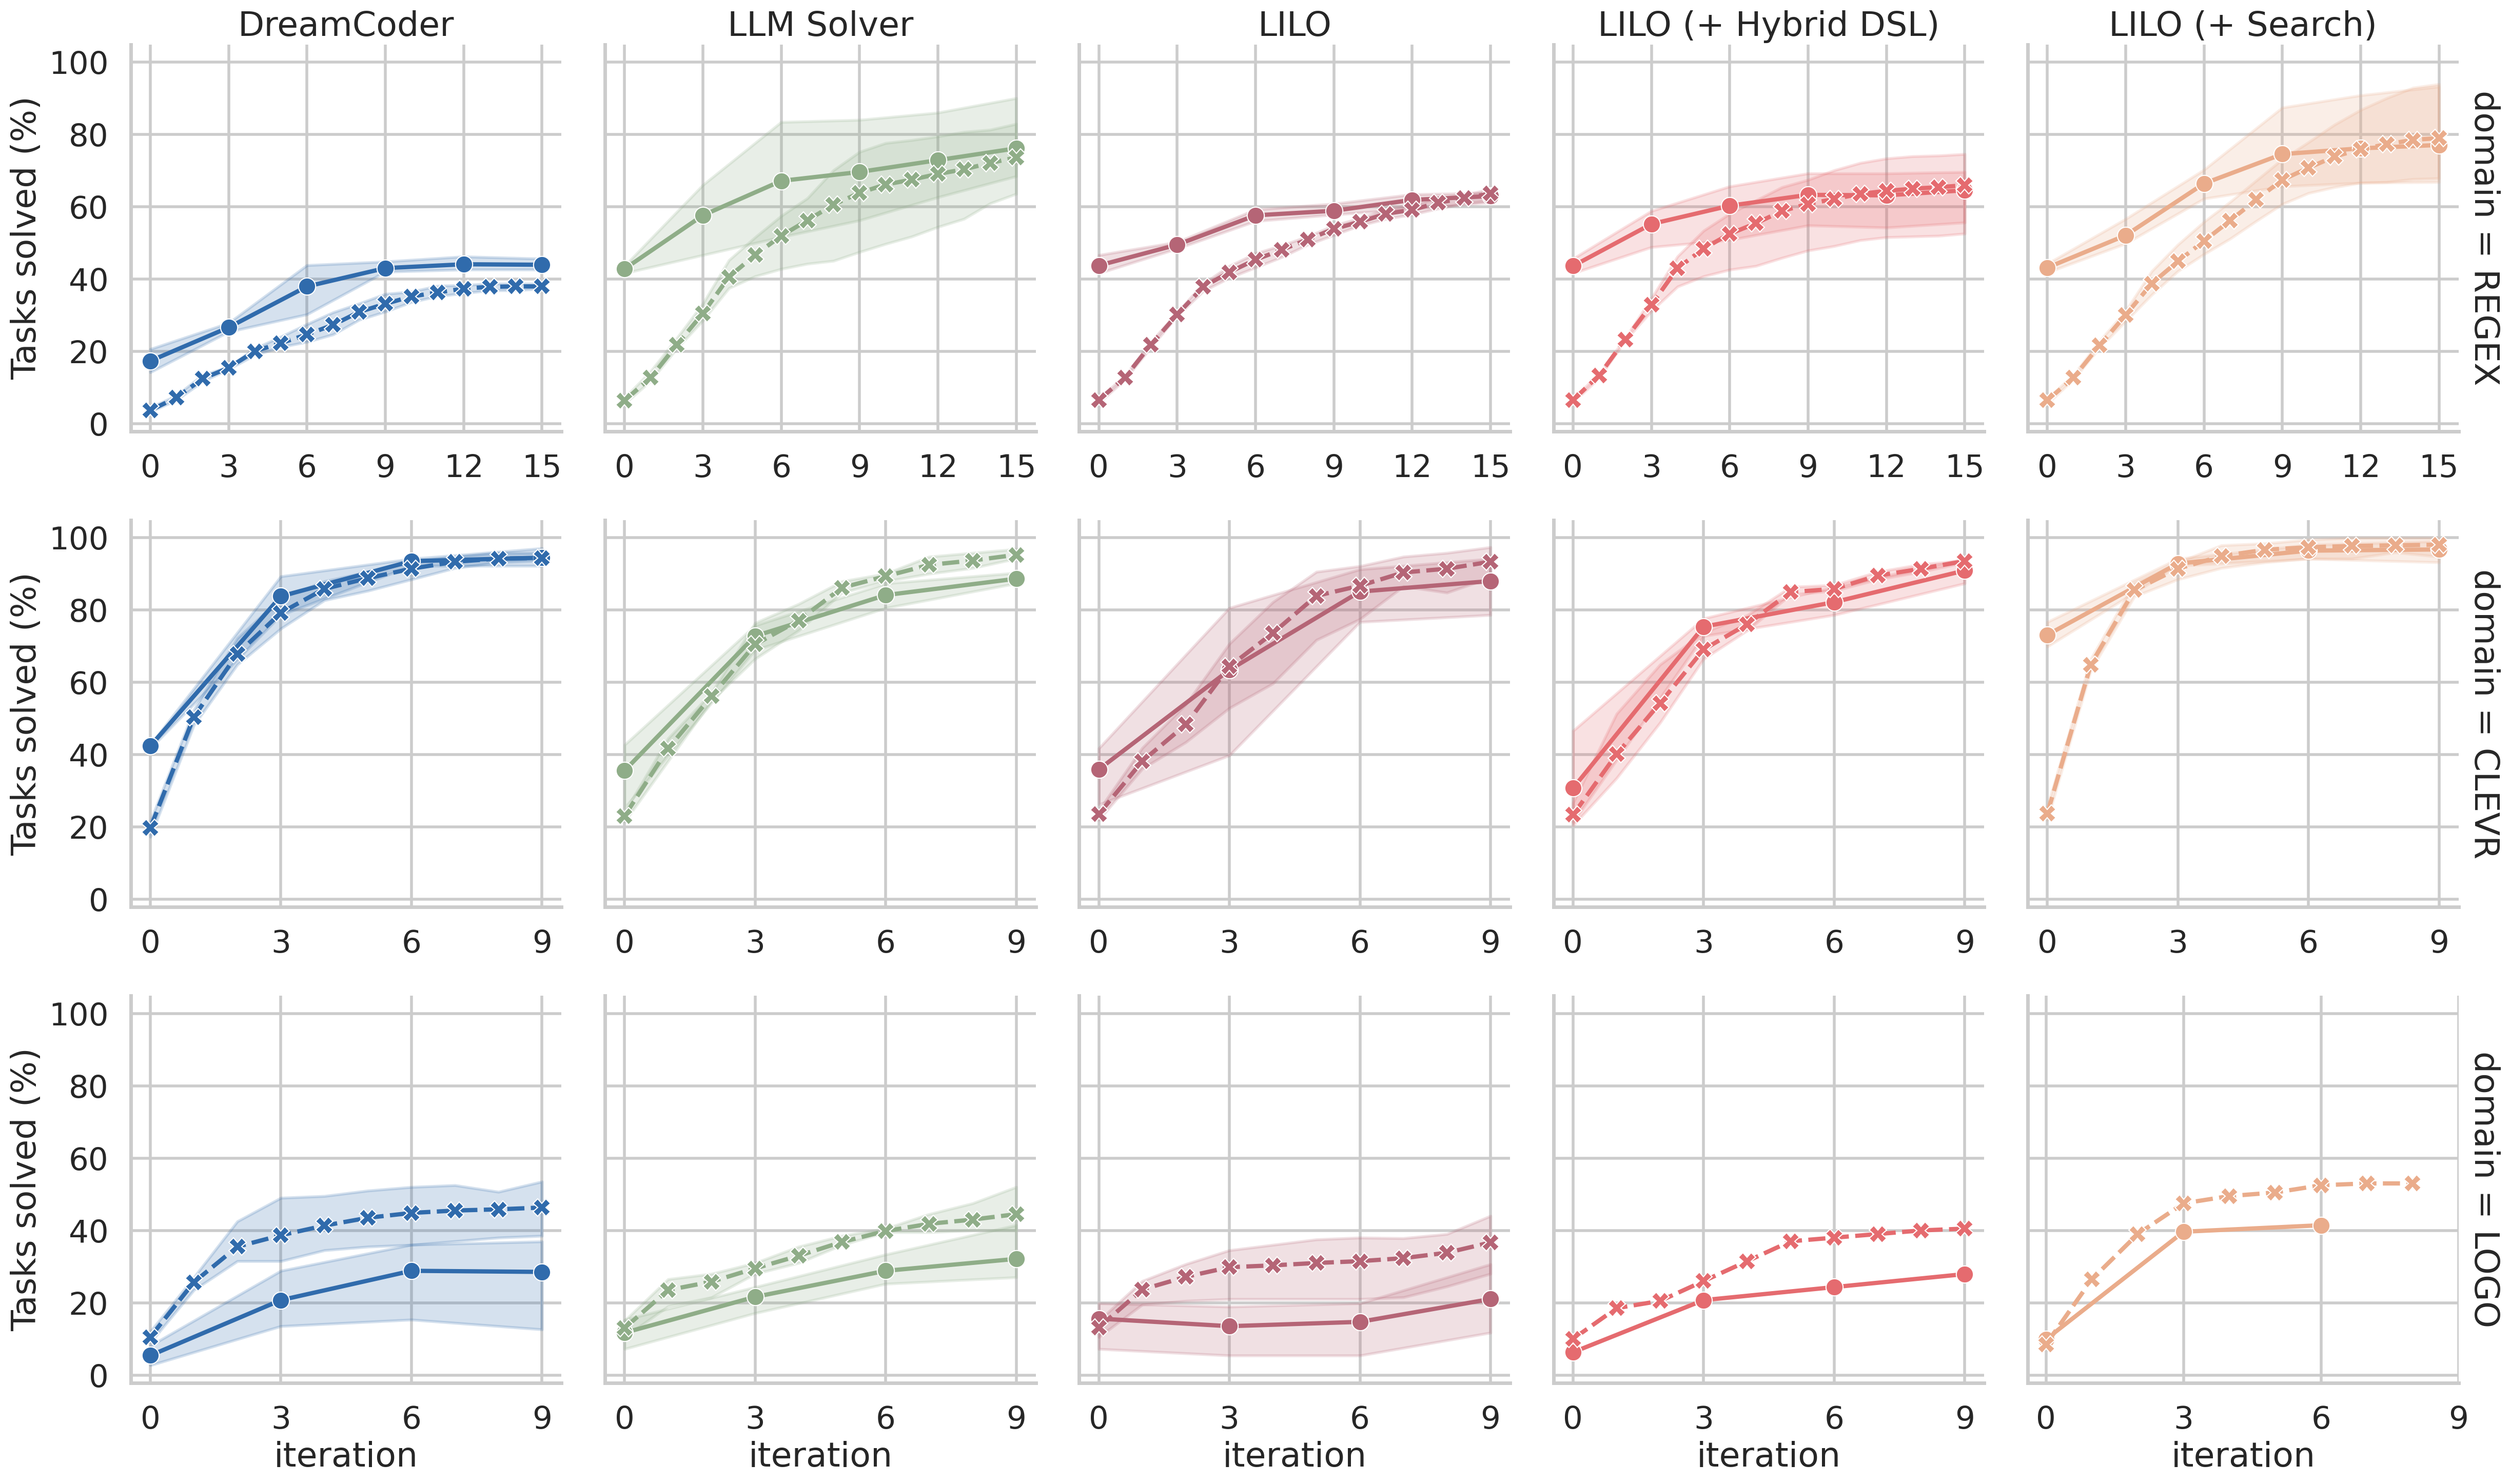

In [25]:
with sns.plotting_context("poster", font_scale=1):
    g = sns.relplot(
        data=analyzer.format_dataframe_camera(df_results),
        kind="line",
        row="domain",
        col=analyzer.COL_NAMES_CAMERA["experiment_type"],
        x="iteration",
        y=analyzer.COL_NAMES_CAMERA["percent_solved"],
        hue=analyzer.COL_NAMES_CAMERA["experiment_type"],
        style="split",
        markers=True,
        # errorbar="se",
        # col_order=["train", "test"],
        row_order = list(analyzer.DOMAIN_NAMES_CAMERA.values()),
        facet_kws={'sharex': False, 'sharey': True, 'margin_titles': True},
        palette=analyzer.EXPERIMENT_TYPES_PALETTE,
        legend=False,
    )
    for subplot in g.axes[0]:
        subplot.set_title(subplot.title.get_text().split(" = ")[-1])
        
    for ax in g.axes[0]:
        ax.set_xticks(np.arange(0, 16, 3))
    for ax in g.axes[1]:
        ax.set_xticks(np.arange(0, 10, 3))
    for ax in g.axes[2]:
        ax.set_xticks(np.arange(0, 10, 3))
        
    # sns.move_legend(g, "lower center")
        
    # plt.savefig(os.path.join(FIGURES_DIR, "main_results.pdf"), dpi=300, bbox_inches="tight")

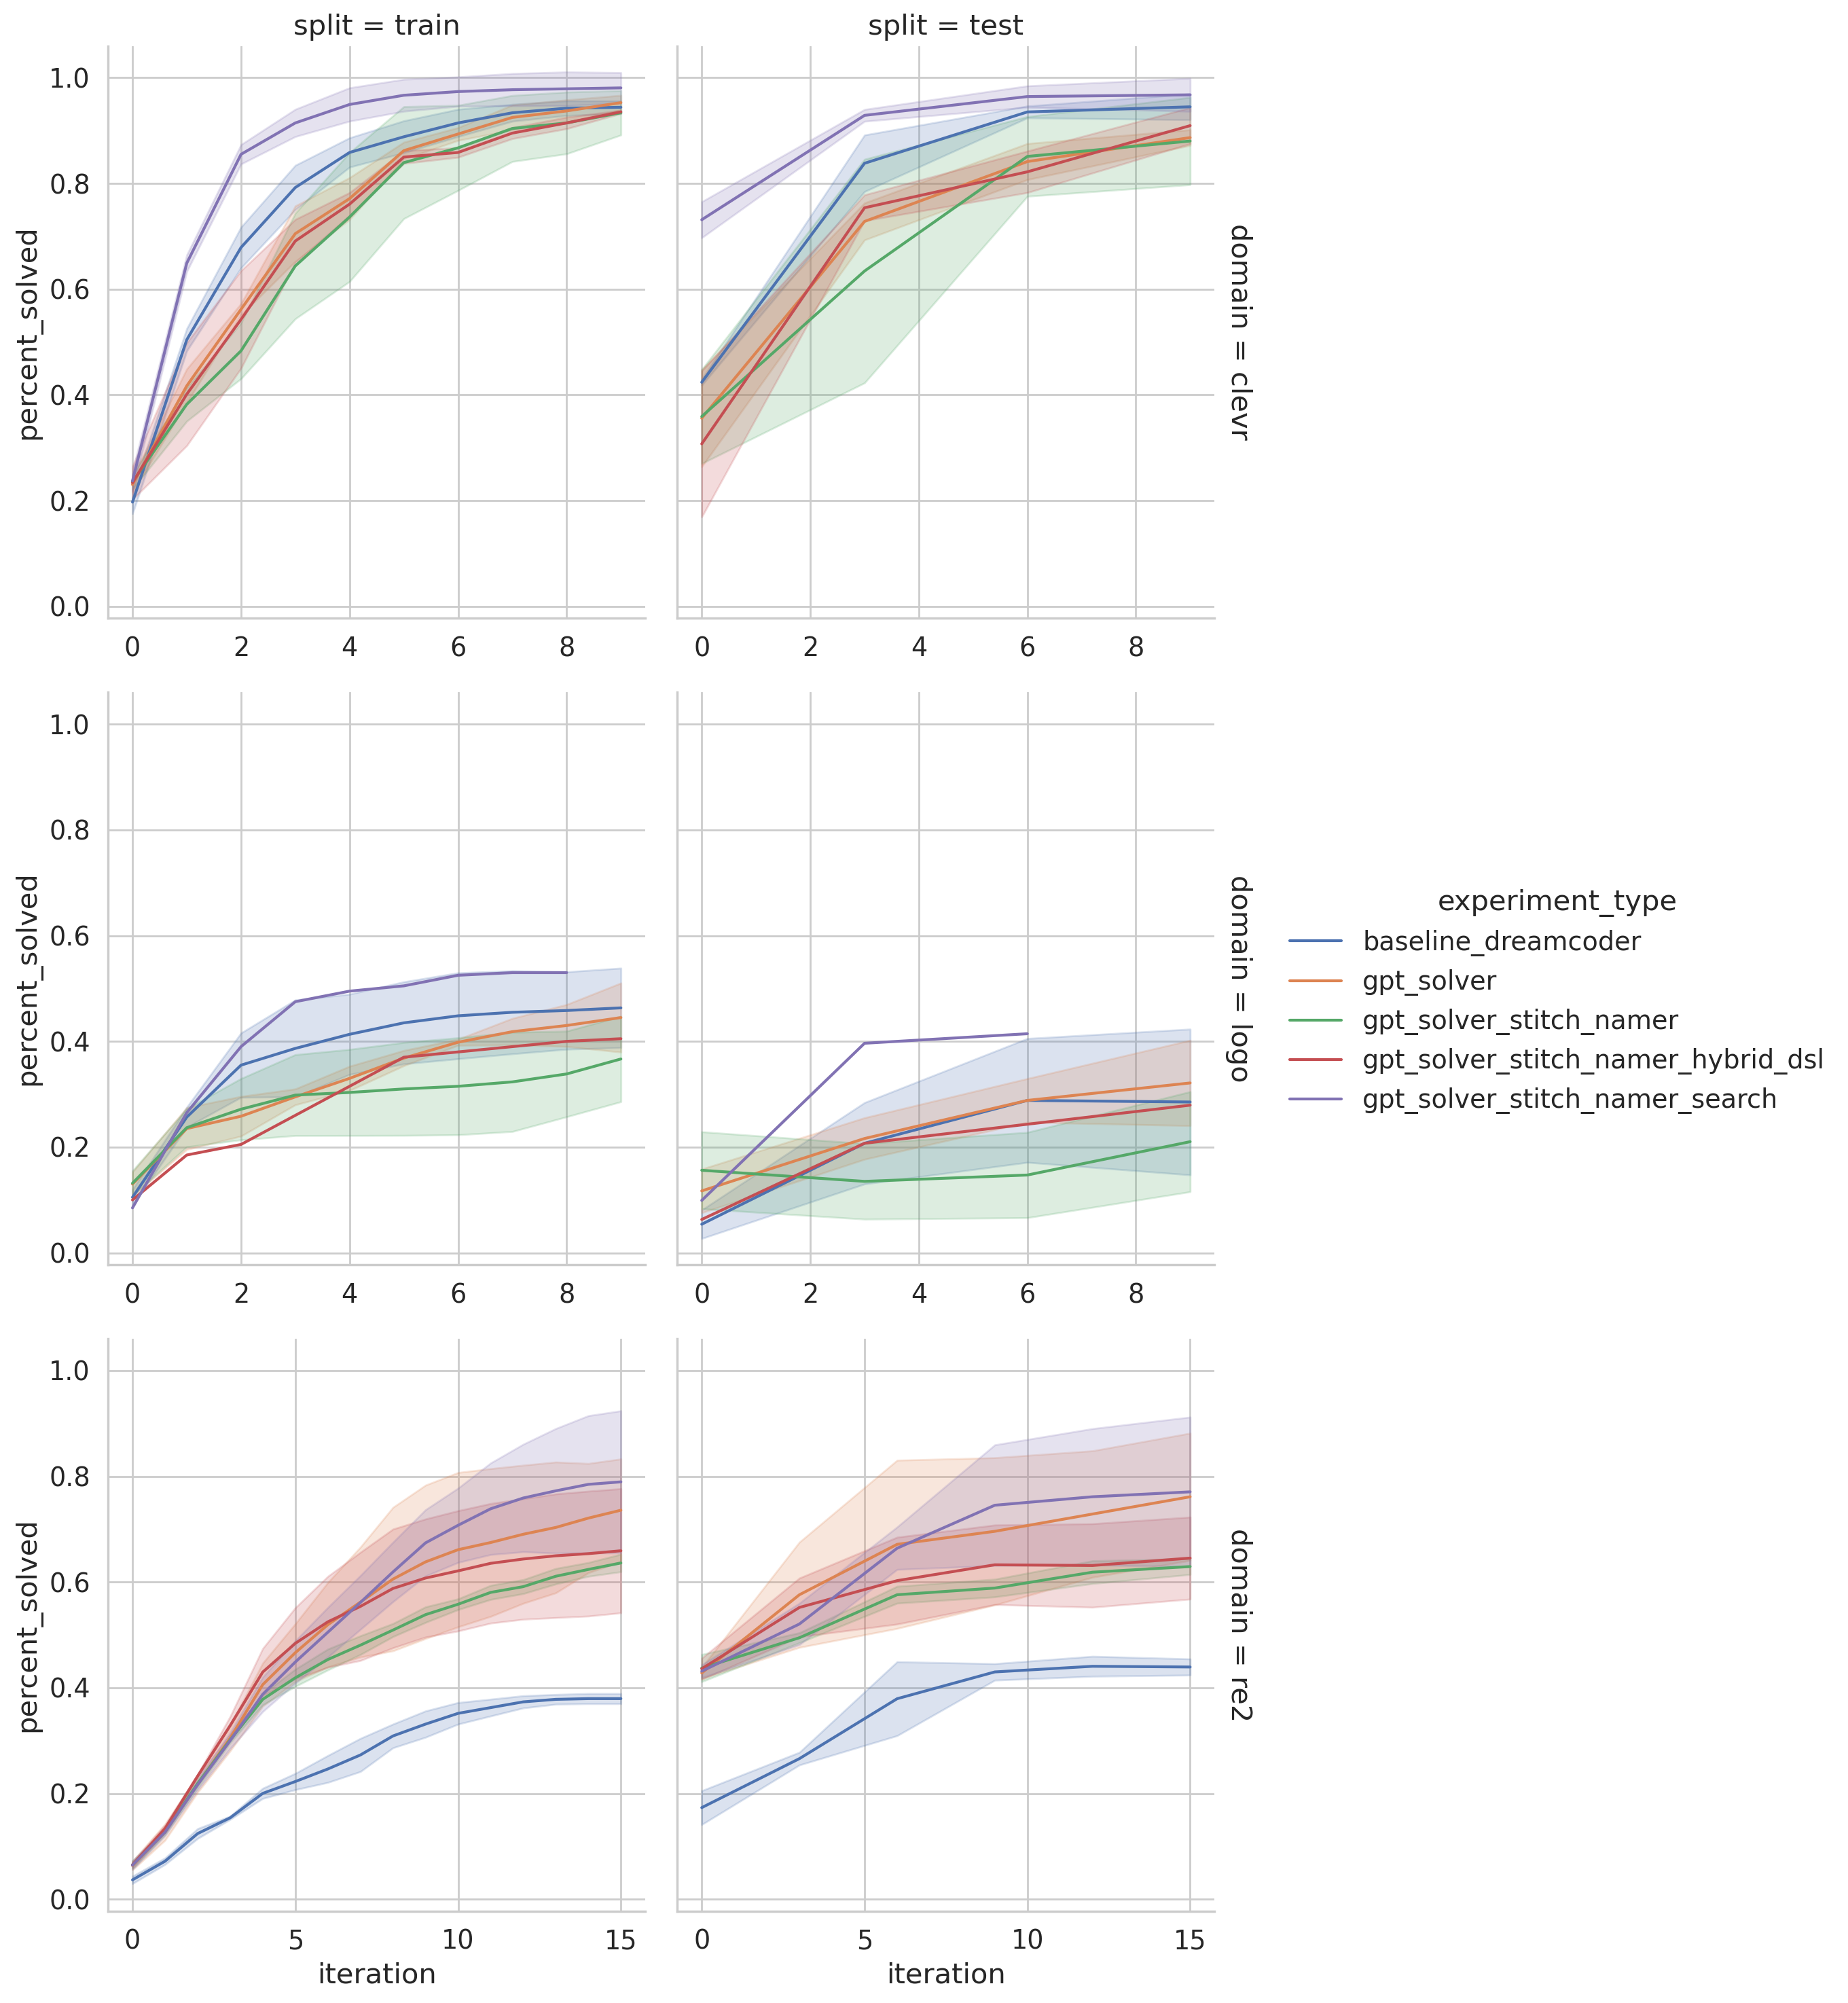

In [292]:
sns.relplot(
    data=df_results,
    kind="line",
    row="domain",
    col="split",
    x="iteration", 
    y="percent_solved", 
    hue="experiment_type",
    # style="seed",
    markers=True,
    errorbar="sd", # se
    col_order=["train", "test"],
    facet_kws={'sharex': False, 'sharey': True, 'margin_titles': True}
)
# plt.suptitle(f"{DOMAIN}", y=1.025)

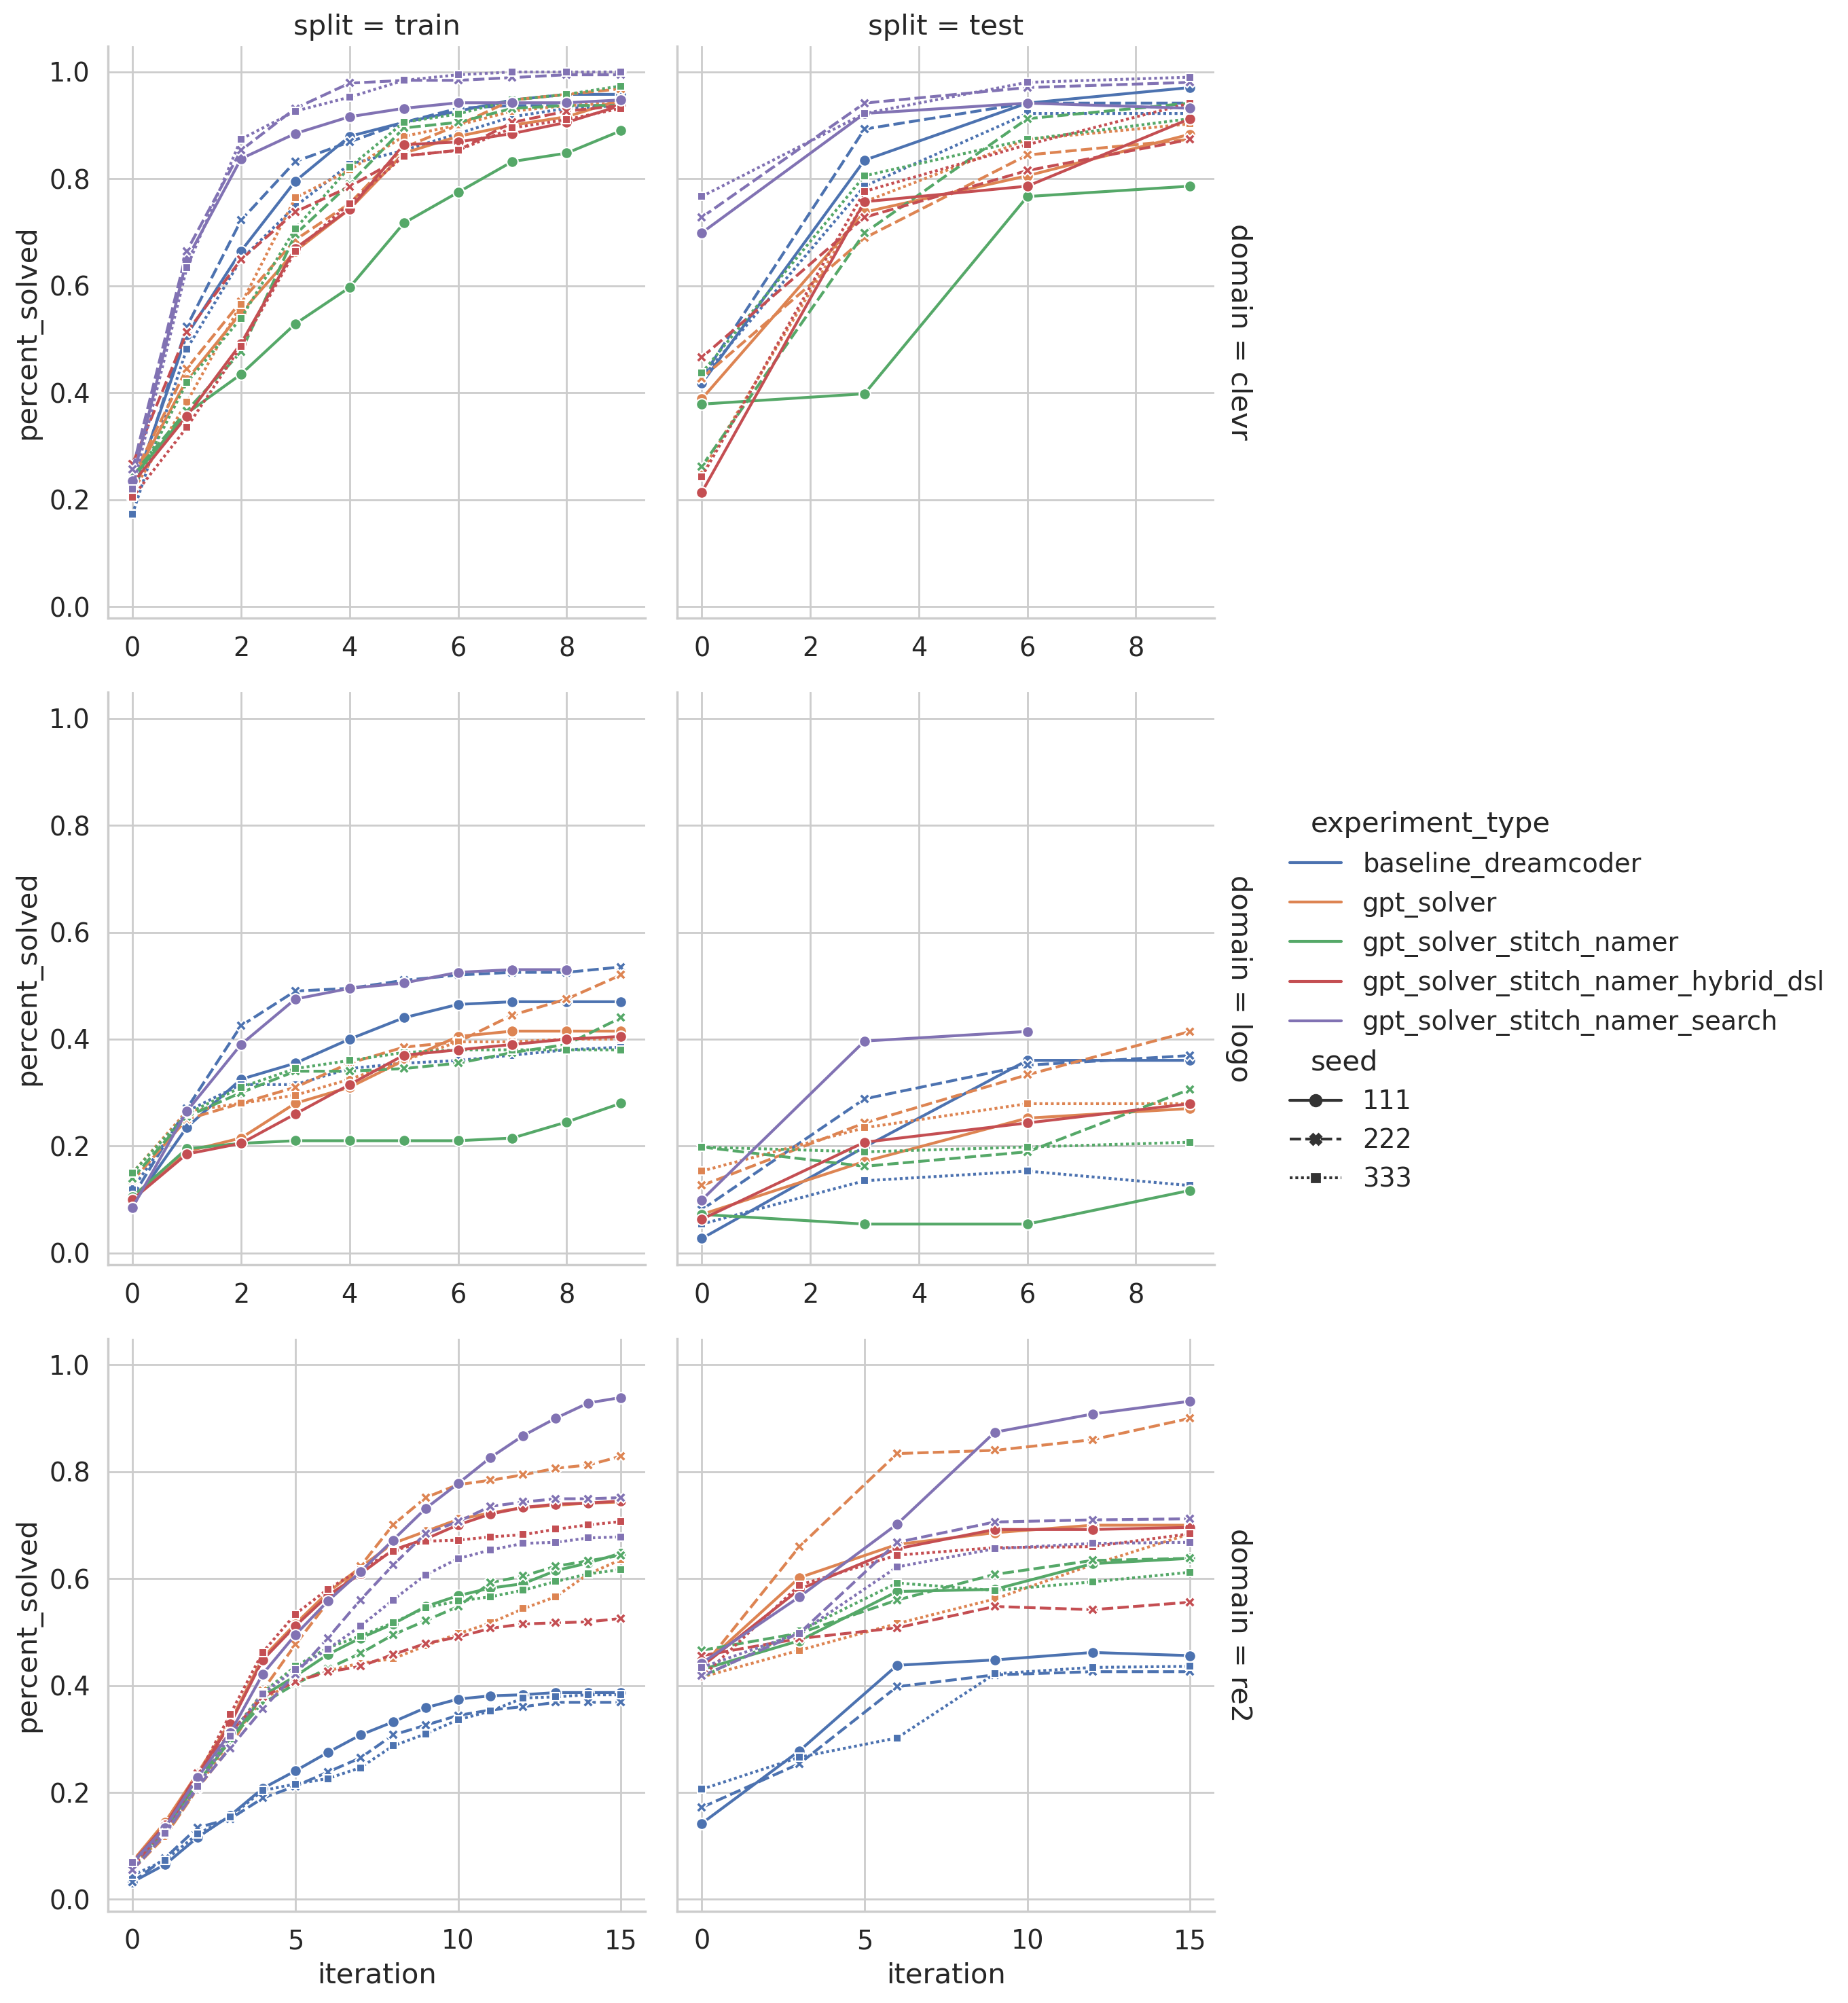

In [287]:
sns.relplot(
    data=df_results,
    kind="line",
    row="domain",
    col="split",
    x="iteration", 
    y="percent_solved", 
    hue="experiment_type",
    style="seed",
    markers=True,
    # errorbar="se",
    col_order=["train", "test"],
    facet_kws={'sharex': False, 'sharey': True, 'margin_titles': True}
)
# plt.suptitle(f"{DOMAIN}", y=1.025)

# Main results table

In [26]:
df_results_test = df_results.query("split == 'test'")
grouped = analyzer.format_dataframe_camera(df_results_test).groupby([
    "domain",
    analyzer.COL_NAMES_CAMERA["experiment_type"],
    "seed",
], as_index=False)

def _get_final_iteration(group):
    final_iteration = group["iteration"].max().item()
    return group[group["iteration"] == final_iteration]

df_results_test = grouped.apply(_get_final_iteration).reset_index(drop=True)
df_results_test

domain                Model  seed  iteration split  n_solved  \
0   CLEVR           DreamCoder   111          9  test       100   
1   CLEVR           DreamCoder   222          9  test        97   
2   CLEVR           DreamCoder   333          9  test        95   
3   CLEVR                 LILO   111          9  test        81   
4   CLEVR                 LILO   222          9  test        97   
5   CLEVR                 LILO   333          9  test        94   
6   CLEVR  LILO (+ Hybrid DSL)   111          9  test        94   
7   CLEVR  LILO (+ Hybrid DSL)   222          9  test        90   
8   CLEVR  LILO (+ Hybrid DSL)   333          9  test        97   
9   CLEVR      LILO (+ Search)   111          9  test        96   
10  CLEVR      LILO (+ Search)   222          9  test       101   
11  CLEVR      LILO (+ Search)   333          9  test       102   
12  CLEVR           LLM Solver   111          9  test        91   
13  CLEVR           LLM Solver   222          9  test        90   
14  CLEVR           LLM Solver   333          9  test        93   
15   LOGO           DreamCoder   111          9  test        40   
16   LOGO           DreamCoder   222          9  test        41   
17   LOGO           DreamCoder   333          9  test        14   
18   LOGO                 LILO   111          9  test        13   
19   LOGO                 LILO   222          9  test        34   
20   LOGO                 LILO   333          9  test        23   
21   LOGO  LILO (+ Hybrid DSL)   111          9  test        31   
22   LOGO      LILO (+ Search)   111          6  test        46   
23   LOGO           LLM Solver   111          9  test        30   
24   LOGO           LLM Solver   222          9  test        46   
25   LOGO           LLM Solver   333          9  test        31   
26  REGEX           DreamCoder   111         15  test       228   
27  REGEX           DreamCoder   222         15  test       213   
28  REGEX           DreamCoder   333         15  test       218   
29  REGEX                 LILO   111         15  test       319   
30  REGEX                 LILO   222         15  test       319   
31  REGEX                 LILO   333         15  test       306   
32  REGEX  LILO (+ Hybrid DSL)   111         15  test       348   
33  REGEX  LILO (+ Hybrid DSL)   222         15  test       278   
34  REGEX  LILO (+ Hybrid DSL)   333         15  test       342   
35  REGEX      LILO (+ Search)   111         15  test       466   
36  REGEX      LILO (+ Search)   222         15  test       356   
37  REGEX      LILO (+ Search)   333         15  test       334   
38  REGEX           LLM Solver   111         15  test       350   
39  REGEX           LLM Solver   222         15  test       450   
40  REGEX           LLM Solver   333         15  test       342   

    Tasks solved (%)  
0          97.087379  
1          94.174757  
2          92.233010  
3          78.640777  
4          94.174757  
5          91.262136  
6          91.262136  
7          87.378641  
8          94.174757  
9          93.203883  
10         98.058252  
11         99.029126  
12         88.349515  
13         87.378641  
14         90.291262  
15         36.036036  
16         36.936937  
17         12.612613  
18         11.711712  
19         30.630631  
20         20.720721  
21         27.927928  
22         41.441441  
23         27.027027  
24         41.441441  
25         27.927928  
26         45.600000  
27         42.600000  
28         43.600000  
29         63.800000  
30         63.800000  
31         61.200000  
32         69.600000  
33         55.600000  
34         68.400000  
35         93.200000  
36         71.200000  
37         66.800000  
38         70.000000  
39         90.000000  
40         68.400000

In [266]:
df_metrics_test = df_results_test.groupby([
    "domain",
    analyzer.COL_NAMES_CAMERA["experiment_type"],
]) \
[[
    analyzer.COL_NAMES_CAMERA["percent_solved"]
]] \
.agg(["mean", "max", "std"])

# df_metrics_test

In [246]:
df_metrics_test_final.columns

MultiIndex([('CLEVR', 'Tasks solved (%)',  'max'),
            ('CLEVR', 'Tasks solved (%)', 'mean'),
            ('CLEVR', 'Tasks solved (%)',  'std'),
            ( 'LOGO', 'Tasks solved (%)',  'max'),
            ( 'LOGO', 'Tasks solved (%)', 'mean'),
            ( 'LOGO', 'Tasks solved (%)',  'std'),
            ('REGEX', 'Tasks solved (%)',  'max'),
            ('REGEX', 'Tasks solved (%)', 'mean'),
            ('REGEX', 'Tasks solved (%)',  'std')],
           )

In [252]:
# Reorder column levels
df_metrics_test_final = df_metrics_test.reset_index().pivot(index="Model", columns="domain").reorder_levels(order=[0, 2, 1], axis="columns")
df_metrics_test_final.columns.names = [None, None, None]
df_metrics_test_final = df_metrics_test_final.reindex(columns=pd.MultiIndex.from_tuples(sorted(df_metrics_test_final.columns)))
# df_metrics_test_final = df_metrics_test_final.droplevel(axis="columns", level=1)

# Reorder rows
experiment_types = [x for x in analyzer.EXPERIMENT_TYPES_CAMERA.values() if x in df_metrics_test_final.index]
df_metrics_test_final = df_metrics_test_final.reindex(experiment_types)

# Remove 'Model'
df_metrics_test_final.index.name = None

# Round numbers
df_metrics_test_final = df_metrics_test_final.round(2)

# Output to LaTeX
df_metrics_test_final.to_latex("main_results_table.tex")

df_metrics_test_final

Tasks solved (%)                                          \
                               CLEVR                LOGO               REGEX   
                                 max   mean   std    max   mean    std   max   
DreamCoder                     97.09  94.50  2.44  36.94  28.53  13.79  45.6   
LLM Solver                     90.29  88.67  1.48  41.44  32.13   8.07  90.0   
LILO                           94.17  88.03  8.26  30.63  21.02   9.46  63.8   
LILO (+ Hybrid DSL)            94.17  90.94  3.41    NaN    NaN    NaN  69.6   
LILO (+ Search)                99.03  96.76  3.12  41.44  41.44    NaN  93.2   

                                   
                                   
                      mean    std  
DreamCoder           43.93   1.53  
LLM Solver           76.13  12.04  
LILO                 62.93   1.50  
LILO (+ Hybrid DSL)  64.53   7.76  
LILO (+ Search)      77.07  14.14

# Runtime metrics

In [122]:
df_runtime = analyzer.get_runtime_metrics()
df_runtime.groupby(["domain", "experiment_type", "model_type", "model_fn", "task_split"]).time_elapsed.agg("mean")

Not found: ../experiments_iterative/outputs/runs_multi/domains/logo/gpt_solver/seed_333/gpt_solver_96/9/metrics.json


domain  experiment_type                     model_type           model_fn                      task_split
clevr   baseline_dreamcoder                 amortized_synthesis  infer_programs_for_tasks      test           627.410529
                                                                                               train          626.392419
                                                                 optimize_model_for_frontiers  train          639.112597
                                            grammar              infer_programs_for_tasks      train          602.131269
        gpt_solver                          llm_solver           infer_programs_for_tasks      test           754.704399
                                                                                               train          717.473114
        gpt_solver_stitch_namer             library_namer        generate_library_names        train           17.619742
                                            llm

In [123]:
df_infer_programs = df_runtime.query("model_fn == 'infer_programs_for_tasks'").query("model_type != 'grammar'")
df_infer_programs

curr_iteration           model_type                  model_fn  \
0                  0           llm_solver  infer_programs_for_tasks   
2                  0  amortized_synthesis  infer_programs_for_tasks   
3                  0  amortized_synthesis  infer_programs_for_tasks   
5                  1  amortized_synthesis  infer_programs_for_tasks   
7                  2  amortized_synthesis  infer_programs_for_tasks   
...              ...                  ...                       ...   
1262               6  amortized_synthesis  infer_programs_for_tasks   
1264               7           llm_solver  infer_programs_for_tasks   
1266               7  amortized_synthesis  infer_programs_for_tasks   
1268               8           llm_solver  infer_programs_for_tasks   
1270               8  amortized_synthesis  infer_programs_for_tasks   

     task_split                          time_start  \
0         train 2023-05-03 18:24:40.524954368+00:00   
2         train 2023-04-28 22:24:19.571785472+00:00   
3          test 2023-04-28 22:41:05.210528768+00:00   
5         train 2023-04-29 00:13:29.896112384+00:00   
7         train 2023-04-29 00:34:49.866311680+00:00   
...         ...                                 ...   
1262       test 2023-05-08 11:06:50.065977344+00:00   
1264      train 2023-05-08 11:39:46.030694656+00:00   
1266      train 2023-05-08 12:07:07.739521792+00:00   
1268      train 2023-05-08 12:38:51.239604224+00:00   
1270      train 2023-05-08 13:06:42.077441536+00:00   

                                time_end  time_elapsed domain  \
0    2023-05-03 18:32:26.829485824+00:00    466.304532    re2   
2    2023-04-28 22:41:05.207317504+00:00   1005.635532    re2   
3    2023-04-29 00:08:40.567719168+00:00   5255.357190    re2   
5    2023-04-29 00:30:25.199052032+00:00   1015.302940    re2   
7    2023-04-29 00:51:45.249414912+00:00   1015.383103    re2   
...                                  ...           ...    ...   
1262 2023-05-08 11:37:26.417648896+00:00   1836.351671   logo   
1264 2023-05-08 11:50:08.164440576+00:00    622.133746   logo   
1266 2023-05-08 12:37:35.449454336+00:00   1827.709933   logo   
1268 2023-05-08 12:50:09.945601280+00:00    678.705997   logo   
1270 2023-05-08 13:37:11.418164736+00:00   1829.340723   logo   

                     experiment_type  seed  iteration  
0                baseline_dreamcoder   111          0  
2                baseline_dreamcoder   111          0  
3                baseline_dreamcoder   111          0  
5                baseline_dreamcoder   111          1  
7                baseline_dreamcoder   111          2  
...                              ...   ...        ...  
1262  gpt_solver_stitch_namer_search   111          6  
1264  gpt_solver_stitch_namer_search   111          7  
1266  gpt_solver_stitch_namer_search   111          7  
1268  gpt_solver_stitch_namer_search   111          8  
1270  gpt_solver_stitch_namer_search   111          8  

[797 rows x 11 columns]

In [124]:
analyzer.format_dataframe_camera(df_infer_programs)

curr_iteration           model_type                  model_fn  \
0                  0           llm_solver  infer_programs_for_tasks   
2                  0  amortized_synthesis  infer_programs_for_tasks   
3                  0  amortized_synthesis  infer_programs_for_tasks   
5                  1  amortized_synthesis  infer_programs_for_tasks   
7                  2  amortized_synthesis  infer_programs_for_tasks   
...              ...                  ...                       ...   
1262               6  amortized_synthesis  infer_programs_for_tasks   
1264               7           llm_solver  infer_programs_for_tasks   
1266               7  amortized_synthesis  infer_programs_for_tasks   
1268               8           llm_solver  infer_programs_for_tasks   
1270               8  amortized_synthesis  infer_programs_for_tasks   

     task_split                          time_start  \
0         train 2023-05-03 18:24:40.524954368+00:00   
2         train 2023-04-28 22:24:19.571785472+00:00   
3          test 2023-04-28 22:41:05.210528768+00:00   
5         train 2023-04-29 00:13:29.896112384+00:00   
7         train 2023-04-29 00:34:49.866311680+00:00   
...         ...                                 ...   
1262       test 2023-05-08 11:06:50.065977344+00:00   
1264      train 2023-05-08 11:39:46.030694656+00:00   
1266      train 2023-05-08 12:07:07.739521792+00:00   
1268      train 2023-05-08 12:38:51.239604224+00:00   
1270      train 2023-05-08 13:06:42.077441536+00:00   

                                time_end  time_elapsed domain  \
0    2023-05-03 18:32:26.829485824+00:00    466.304532  REGEX   
2    2023-04-28 22:41:05.207317504+00:00   1005.635532  REGEX   
3    2023-04-29 00:08:40.567719168+00:00   5255.357190  REGEX   
5    2023-04-29 00:30:25.199052032+00:00   1015.302940  REGEX   
7    2023-04-29 00:51:45.249414912+00:00   1015.383103  REGEX   
...                                  ...           ...    ...   
1262 2023-05-08 11:37:26.417648896+00:00   1836.351671   LOGO   
1264 2023-05-08 11:50:08.164440576+00:00    622.133746   LOGO   
1266 2023-05-08 12:37:35.449454336+00:00   1827.709933   LOGO   
1268 2023-05-08 12:50:09.945601280+00:00    678.705997   LOGO   
1270 2023-05-08 13:37:11.418164736+00:00   1829.340723   LOGO   

                           Model  seed  iteration  
0                     DreamCoder   111          0  
2                     DreamCoder   111          0  
3                     DreamCoder   111          0  
5                     DreamCoder   111          1  
7                     DreamCoder   111          2  
...                          ...   ...        ...  
1262  LILO (+ DreamCoder Search)   111          6  
1264  LILO (+ DreamCoder Search)   111          7  
1266  LILO (+ DreamCoder Search)   111          7  
1268  LILO (+ DreamCoder Search)   111          8  
1270  LILO (+ DreamCoder Search)   111          8  

[797 rows x 11 columns]

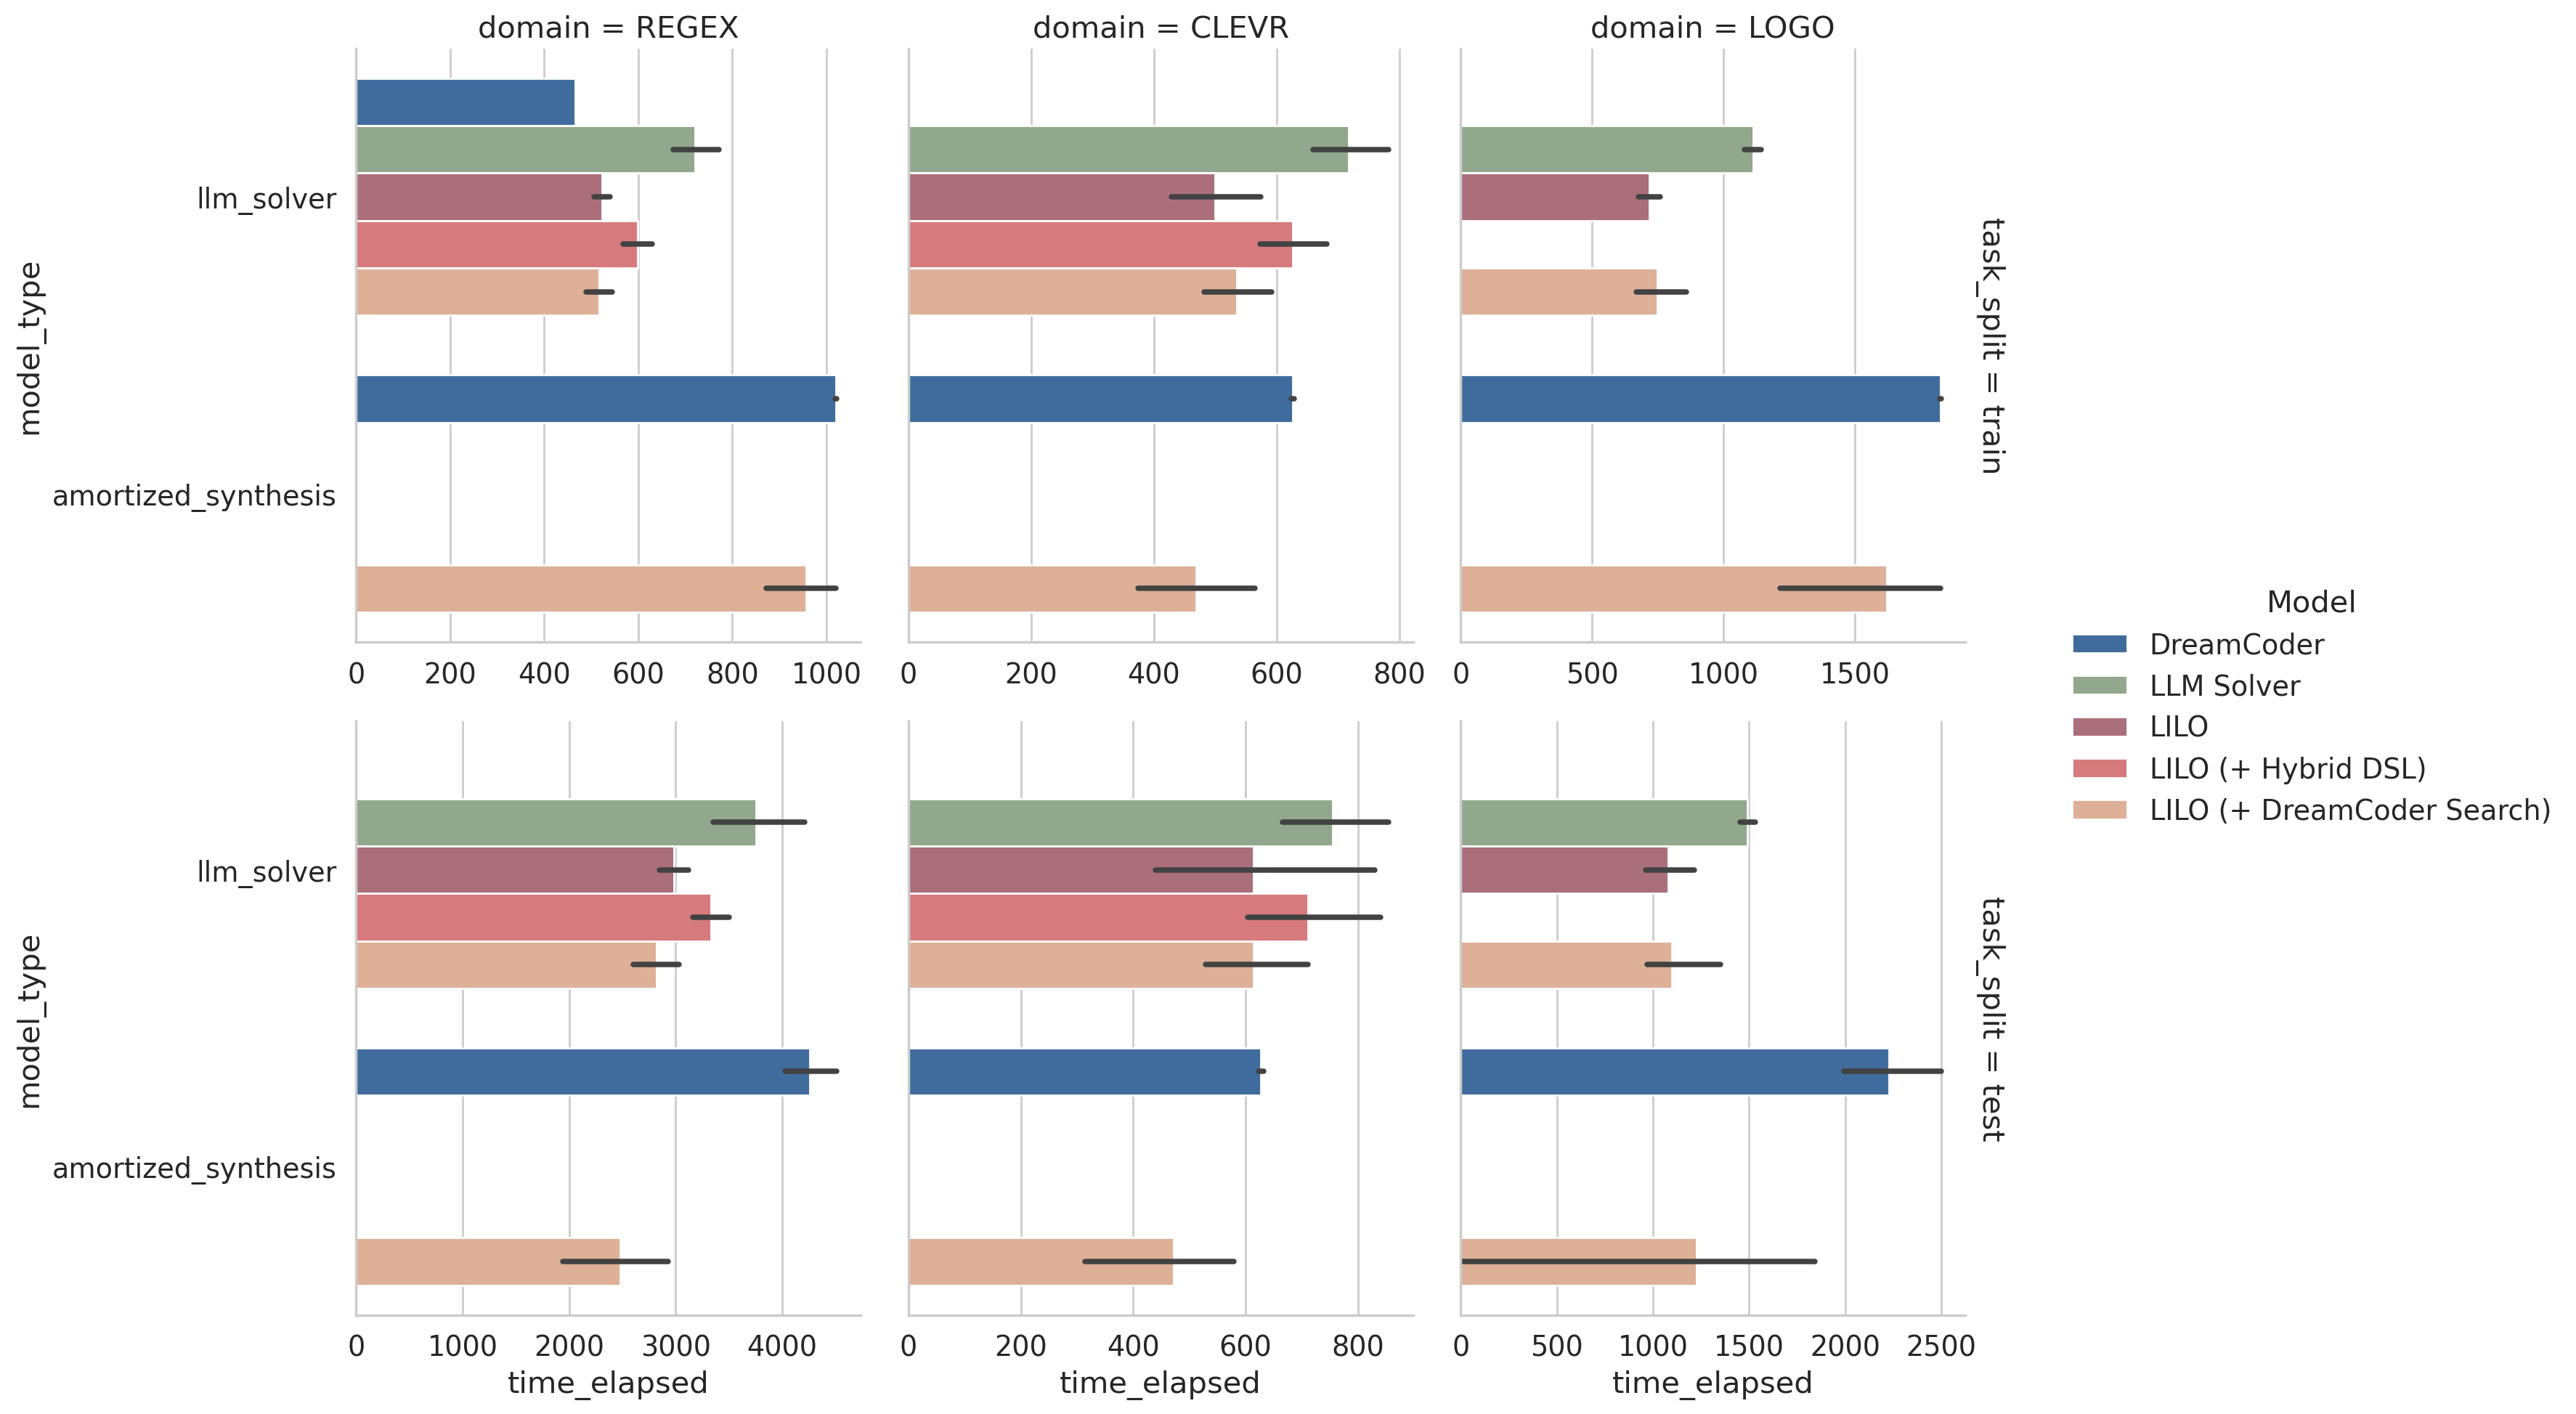

In [125]:
sns.catplot(
    data=analyzer.format_dataframe_camera(df_infer_programs), 
    kind="bar",
    col="domain",
    row="task_split",
    sharex=False, 
    y="model_type",
    x="time_elapsed", 
    hue=analyzer.COL_NAMES_CAMERA["experiment_type"],
    palette=analyzer.EXPERIMENT_TYPES_PALETTE,
    margin_titles=True,
)

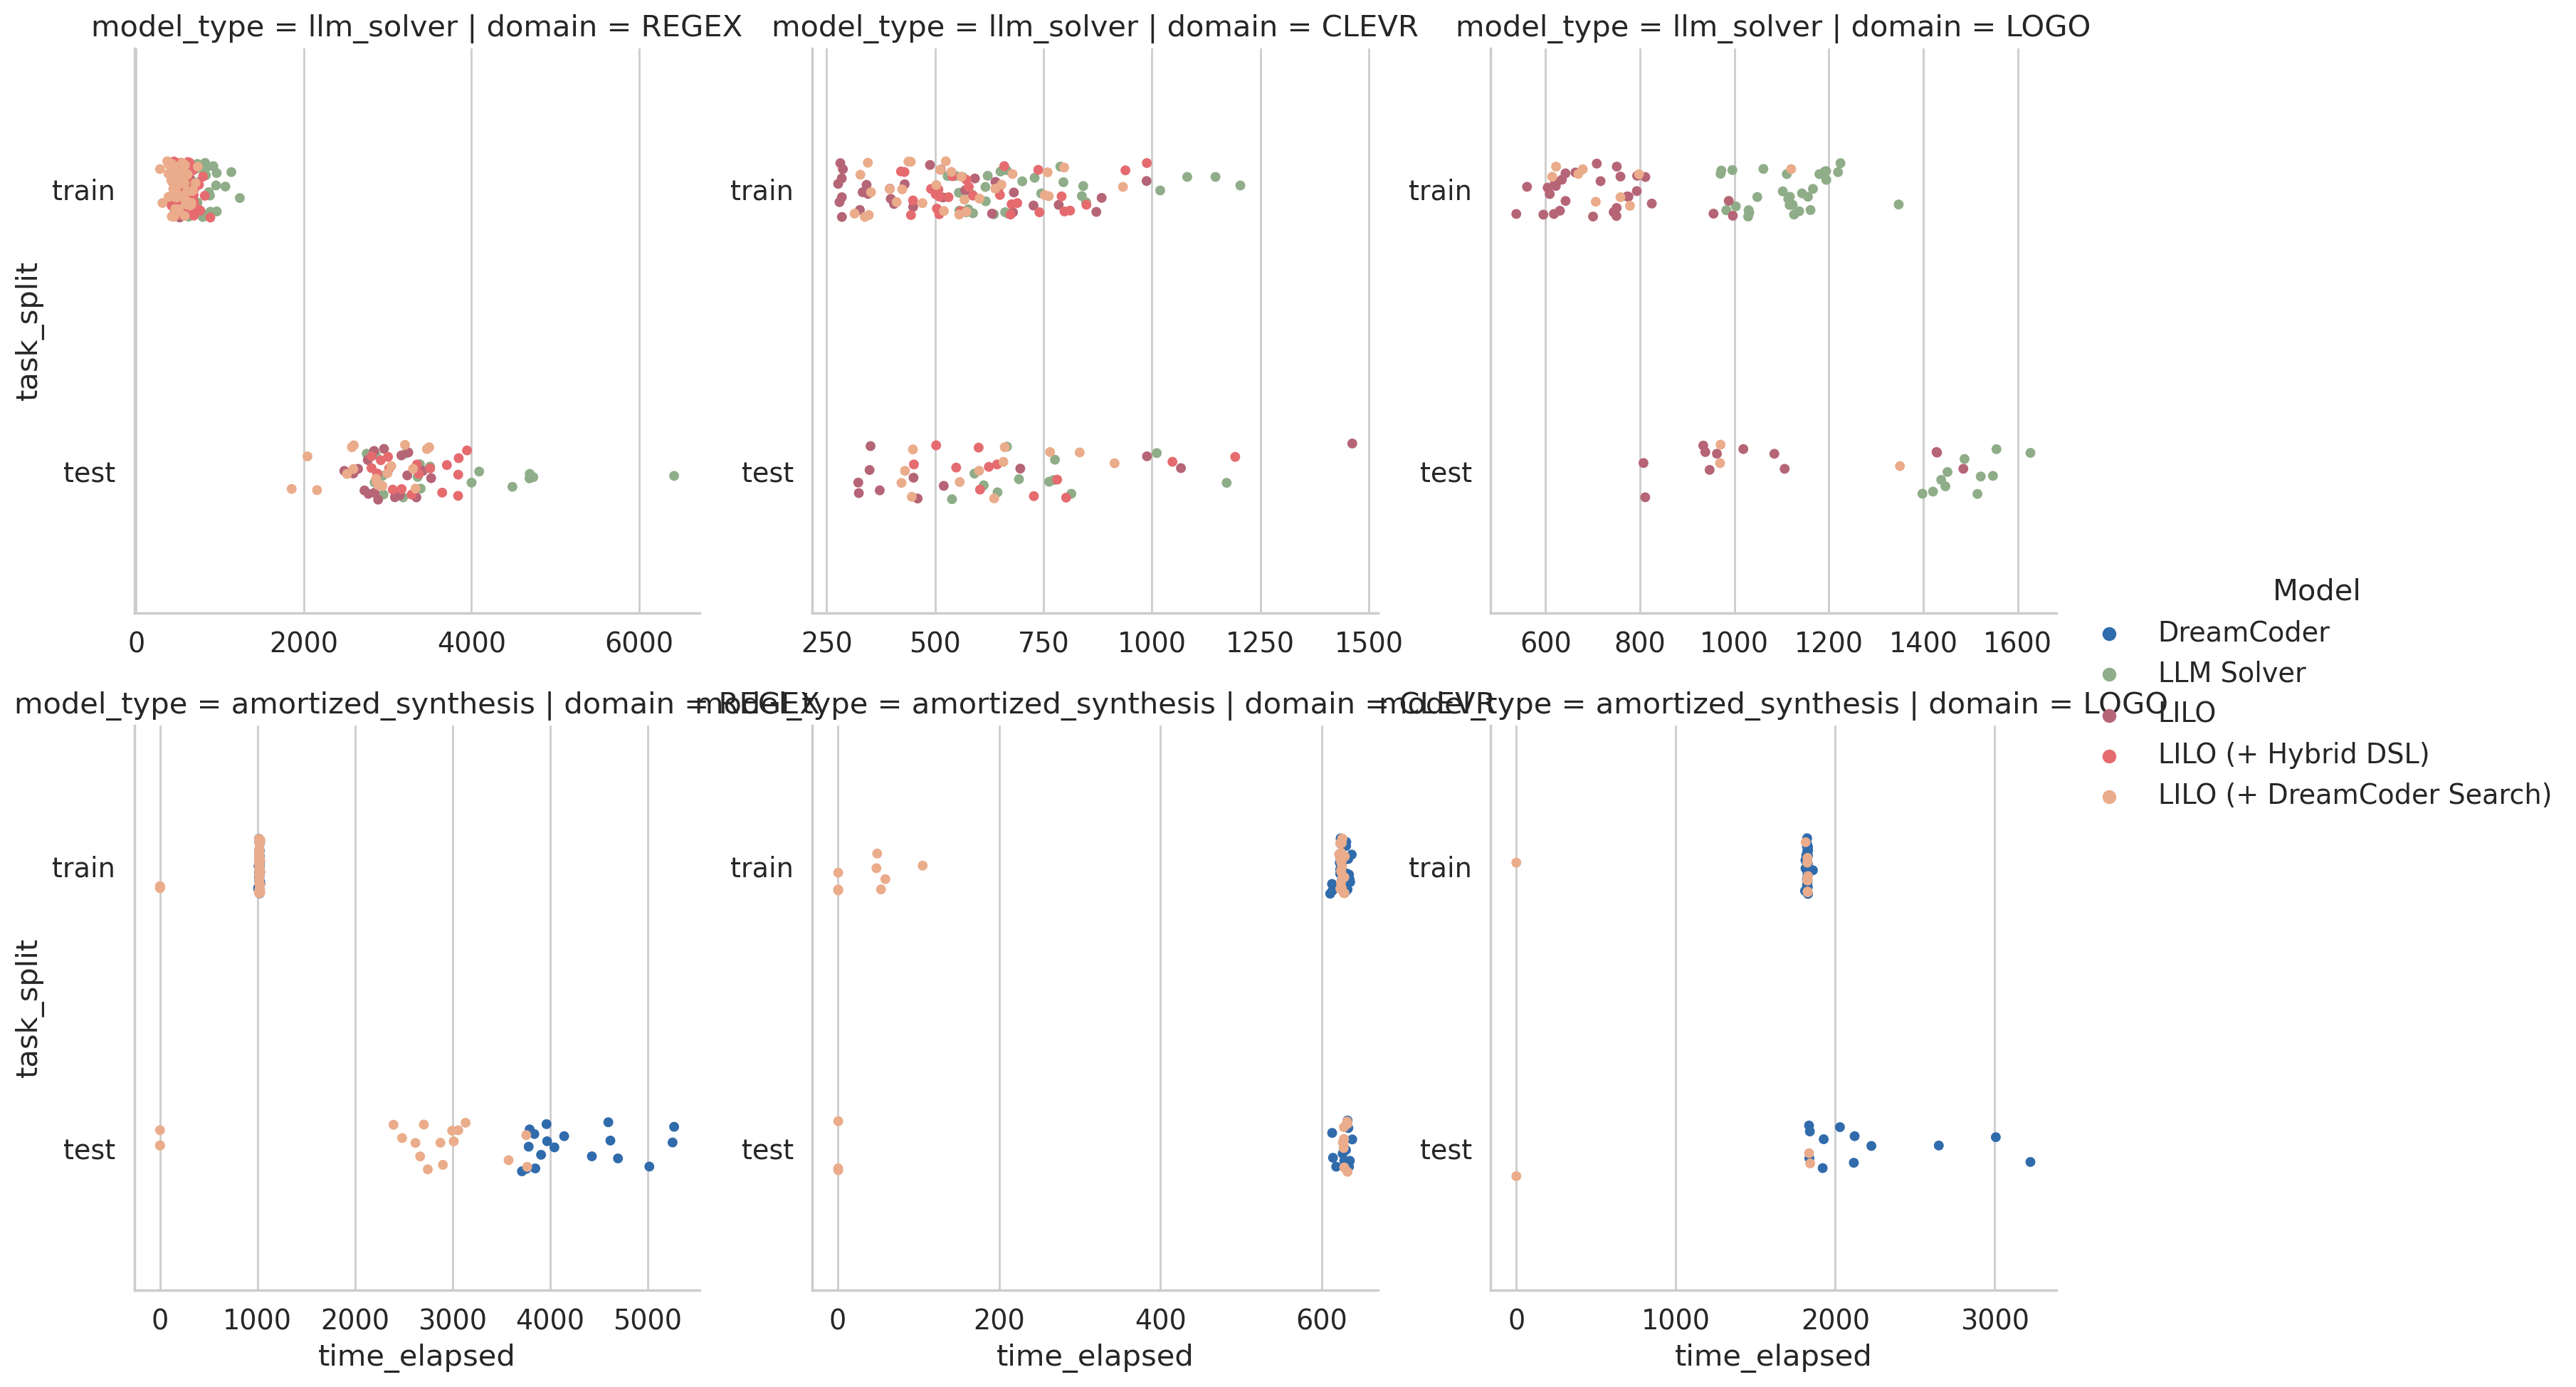

In [126]:
sns.catplot(
    data=analyzer.format_dataframe_camera(df_infer_programs), 
    kind="strip",
    col="domain",
    row="model_type",
    sharex=False, 
    sharey=False,
    y="task_split",
    x="time_elapsed", 
    hue=analyzer.COL_NAMES_CAMERA["experiment_type"],
    palette=analyzer.EXPERIMENT_TYPES_PALETTE,
    margin_titles=True,
)

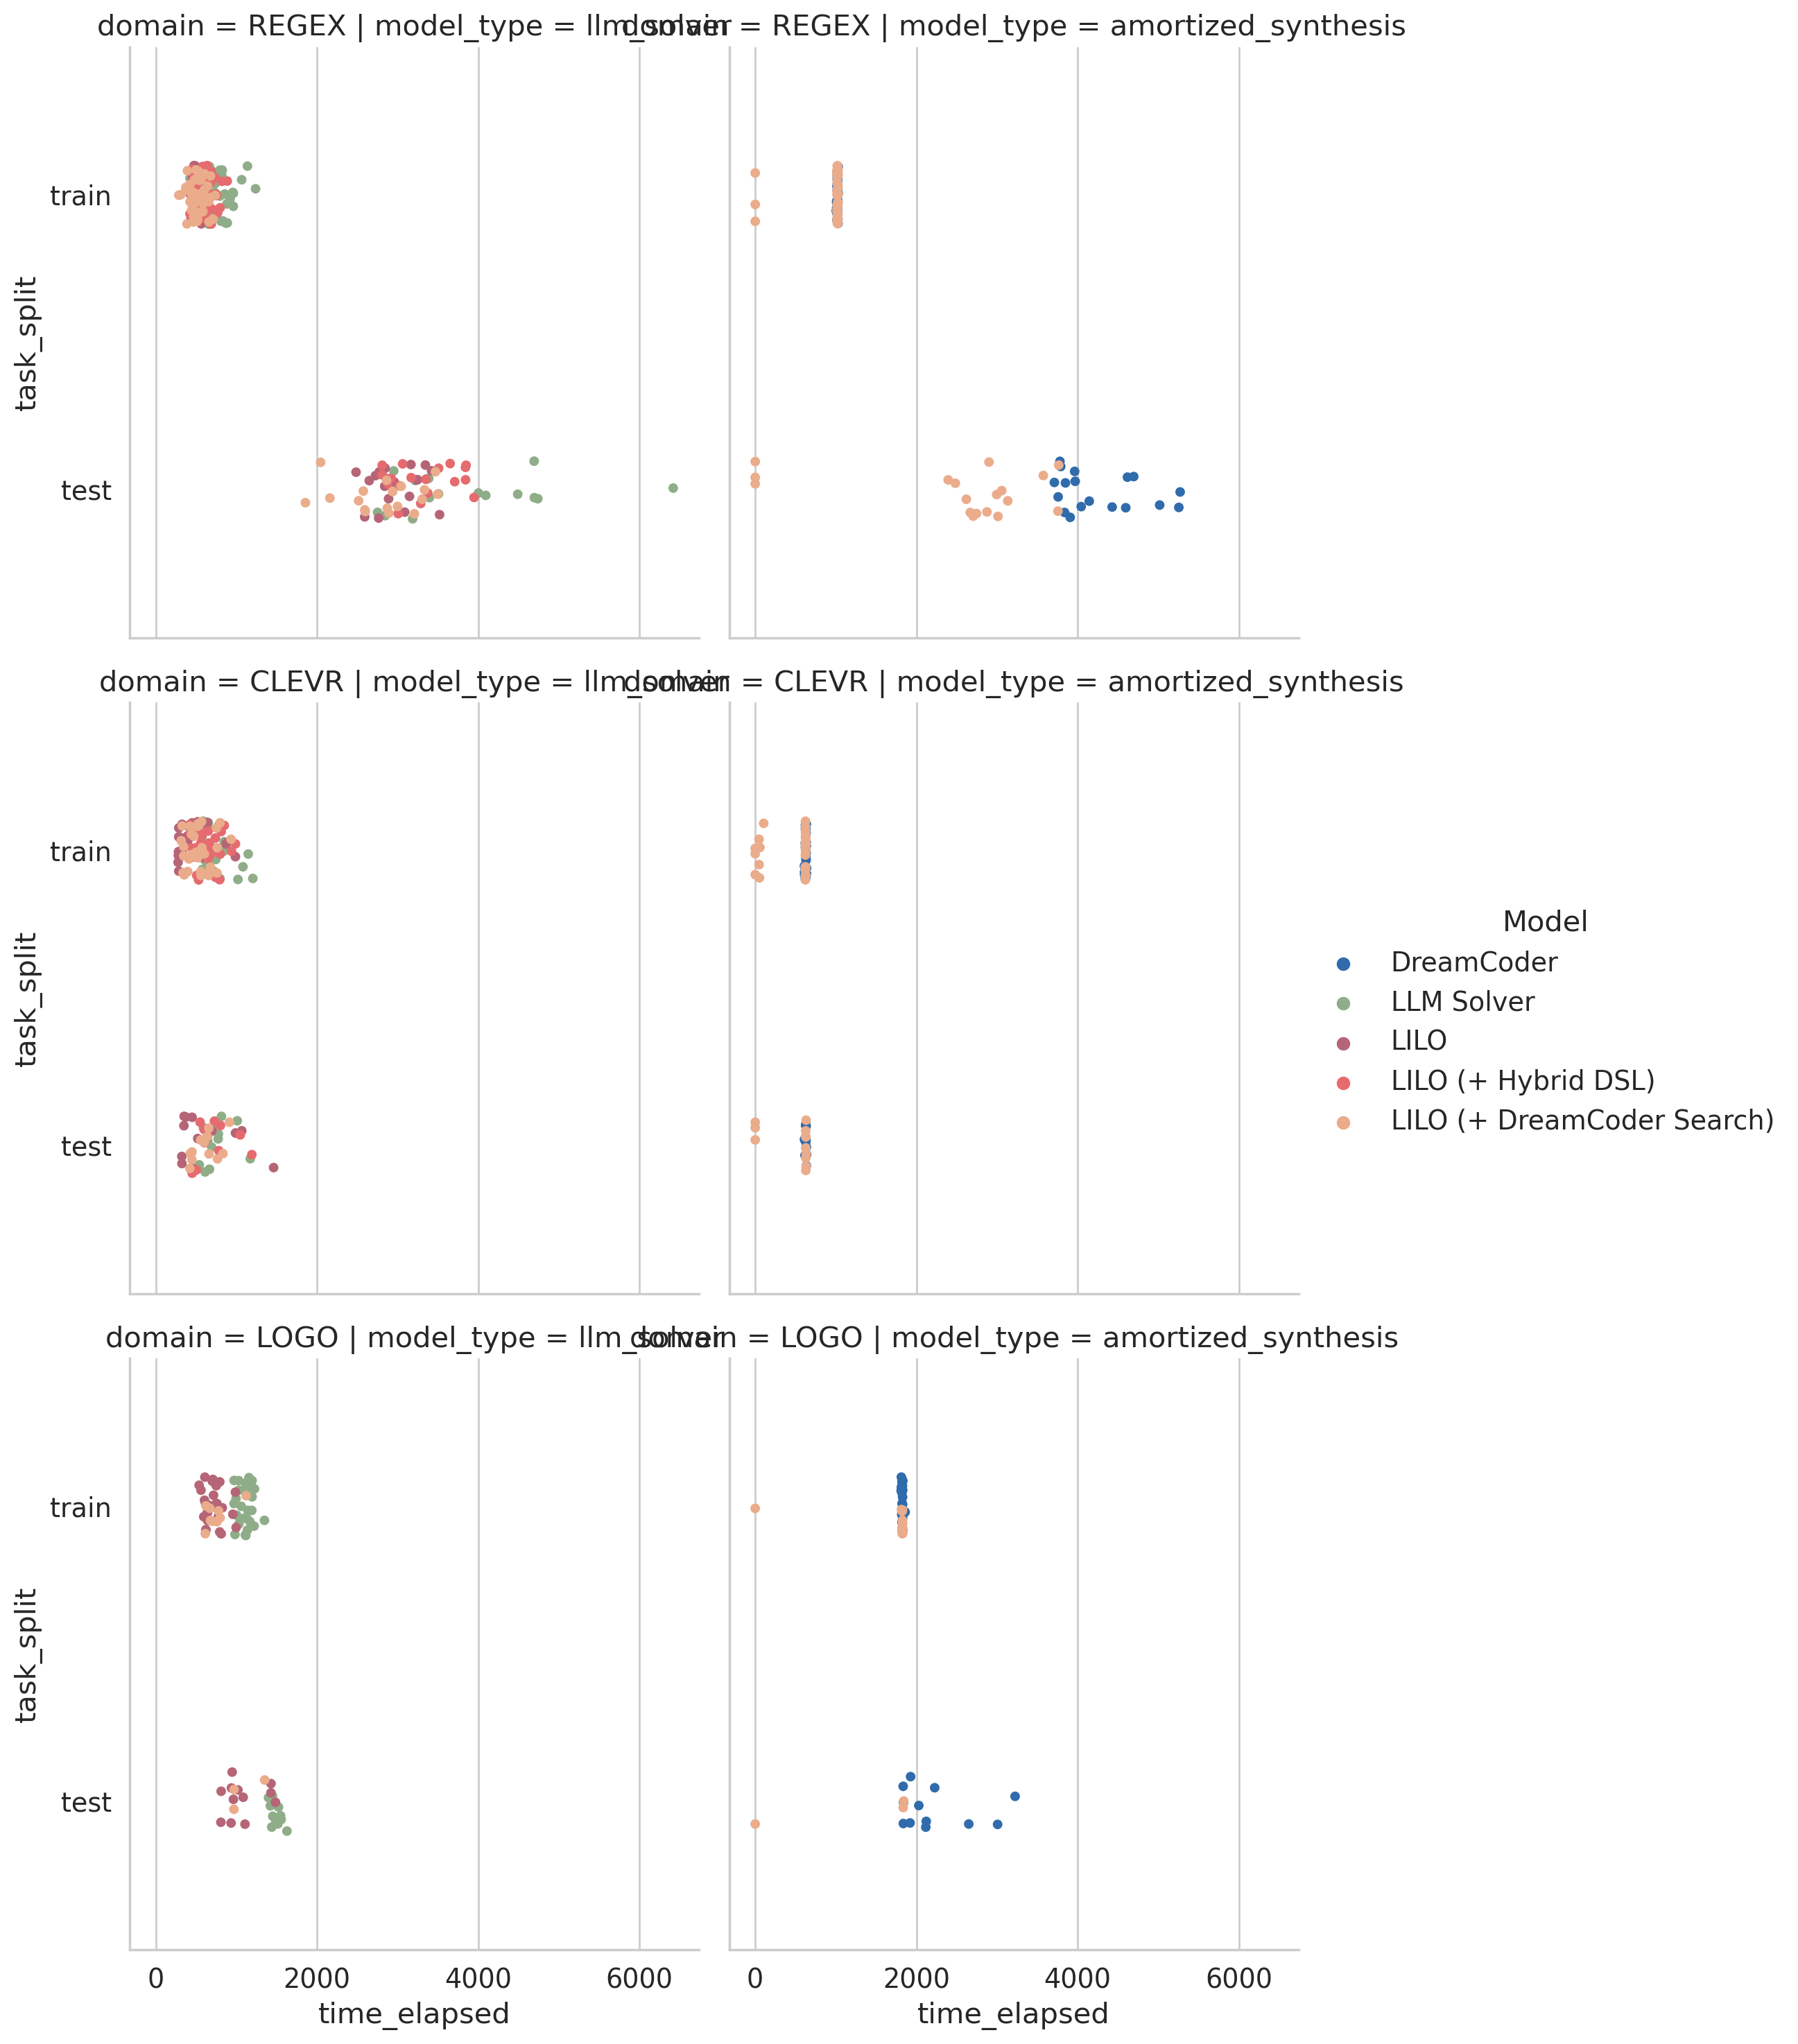

In [127]:
sns.catplot(
    data=analyzer.format_dataframe_camera(df_infer_programs), 
    kind="strip",
    col="model_type",
    row="domain",
    sharex=True,
    # sharey=False,
    y="task_split",
    x="time_elapsed", 
    hue=analyzer.COL_NAMES_CAMERA["experiment_type"],
    palette=analyzer.EXPERIMENT_TYPES_PALETTE,
    margin_titles=True,
)